In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
rent_all = pd.read_csv('rent18.csv')

# Keep subset of features, drop missing values
rent = rent_all[['price', 'beds', 'baths', 'sqft','room_in_apt']].dropna()
rent.head()

,price,beds,baths,sqft,room_in_apt
1,2500,2.0,1.0,1050.0,0
6,3000,3.0,1.5,1100.0,0
7,2743,2.0,2.0,1120.0,0
9,1800,2.0,1.0,650.0,0
13,2950,2.0,1.0,800.0,0


Use simple linear regression to predict rental price from square footage.

In [3]:
# Define input and output features for predicting price based on square footage
X = rent[['sqft']].values.reshape(-1, 1)
y = rent[['price']].values.reshape(-1, 1)

In [4]:
# Initialize and fit simple linear regression model
simpLinModel = LinearRegression()
simpLinModel.fit(X,y)

LinearRegression()

In [5]:
# Estimated intercept weight
simpLinModel.intercept_

array([1373.78577471])

In [6]:
# Estimated weight for sqft feature
simpLinModel.coef_

array([[1.5875292]])

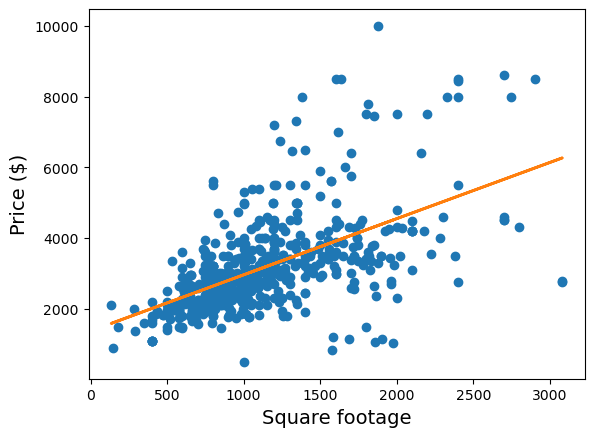

In [7]:
# Plot the data and fitted model

# Find predicted values
yPredicted = simpLinModel.predict(X)

# Plot
plt.scatter(X, y, color='#1f77b4')
plt.plot(X, yPredicted, color='#ff7f0e', linewidth=2)
plt.xlabel('Square footage', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.show()

In [8]:
# Predict the price of a 2,500 square foot rental
simpLinModel.predict([[2500]])

array([[5342.60877778]])

Use multiple linear regression to predict price from square footage and number of bedrooms

In [9]:
# Define input and output features
X = rent[['sqft', 'beds']].values.reshape(-1, 2)
y = rent[['price']].values.reshape(-1, 1)

In [10]:
# Initialize and fit multiple regression model
multRegModel = LinearRegression()
multRegModel.fit(X,y)

LinearRegression()

In [11]:
# Estimated intercept weight
multRegModel.intercept_

array([1371.07323803])

In [12]:
# Estimated weights for sqft and beds features
multRegModel.coef_

array([[1.5739936 , 8.22464955]])

In [13]:
# Predict the price of a 2,500 square foot rental with 2 bedrooms
multRegModel.predict([[2500, 2]])

array([[5322.50654546]])

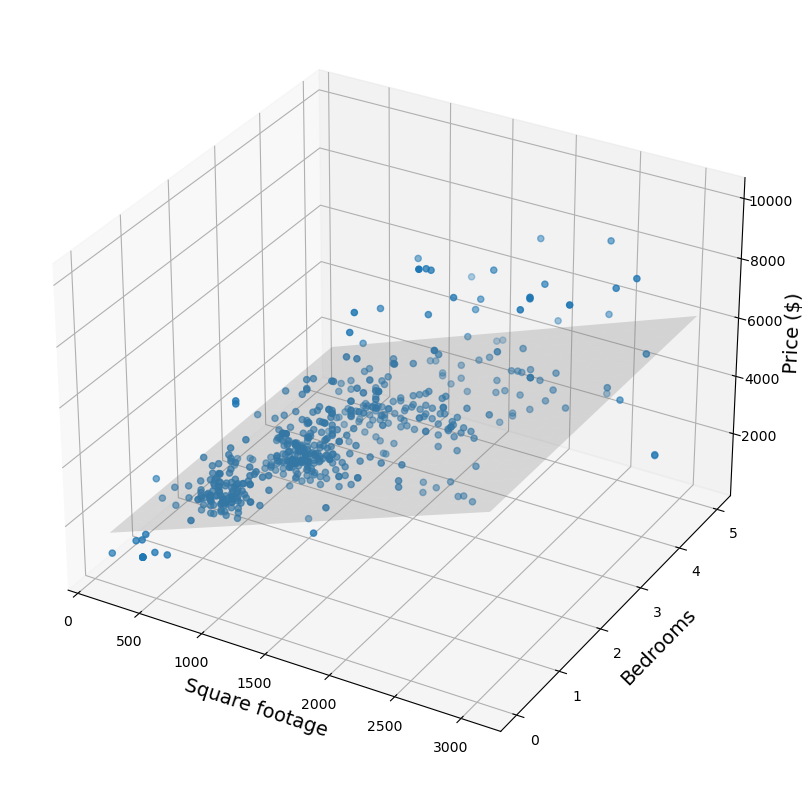

In [13]:
# Plot data and fitted model

# Create grid for prediction surface
Xvals=np.linspace(min(rent['sqft']), max(rent['sqft']),20)
Yvals=np.linspace(min(rent['beds']), max(rent['beds']),20)
Xg, Yg = np.meshgrid(Xvals, Yvals)
Zvals = np.array(multRegModel.intercept_[0] + (Xg * multRegModel.coef_[0,0] +  Yg * multRegModel.coef_[0,1]))

# Plot data and surface
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(rent[['sqft']], rent[['beds']], rent[['price']], color='#1f77b4')
ax.set_xlabel('Square footage', fontsize=14)
ax.set_ylabel('Bedrooms', fontsize=14)
ax.set_zlabel('Price ($)', fontsize=14)
ax.plot_surface(Xg, Yg, Zvals, alpha=.25, color='grey')
plt.show()

Add code below to predict price from square footage, bedrooms, and bathrooms using a multiple regression model

In [17]:
# Define input and output features
X = rent[['sqft', 'beds', 'baths']].values.reshape(-1, 3)
y = rent[['price']].values.reshape(-1, 1)

# Initialize and fit multiple regression model
lr = LinearRegression()
lr.fit(X,y)

# Estimated intercept weight
lr.intercept_

# Estimated weights for sqft and beds features
lr.coef_

# Predict the price of a 2,500 square foot rental with 2 bedrooms, 2 bathrooms
lr.predict([[2500, 2, 2]])

array([[5297.68078461]])

In [18]:

# Estimated intercept weight
lr.intercept_

array([1355.98172179])